In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dfb=pd.read_csv("BiCNN_CUB.csv")
bbest=dfb["test_acc"].max()
dfb[dfb["test_acc"]==bbest]


,epoch,train_loss,test_loss,test_acc,stage,model
253,144,0.985411,0.800350,82.257508,Stage 3,BilinearCNN
303,194,0.977368,0.794610,82.257508,Stage 3,BilinearCNN
307,198,0.904322,0.787355,82.257508,Stage 3,BilinearCNN


In [6]:
dfr=pd.read_csv("resnet152_CUB.csv")
rbest=dfr["test_acc"].max()
dfr[dfr["test_acc"]==rbest]

,epoch,train_loss,test_loss,test_acc,stage,model
228,169,0.82713,0.721409,83.241284,Stage 3,ResNet


In [9]:
dfc=pd.read_csv("standardCNN_CUB.csv")
dfc
cbest=dfc["test_acc"].max()
dfc[dfc["test_acc"]==cbest]

,epoch,train_loss,test_loss,test_acc,stage,model
295,186,0.911674,0.88907,78.028996,Stage 3,StandardCNN


# Accuracy

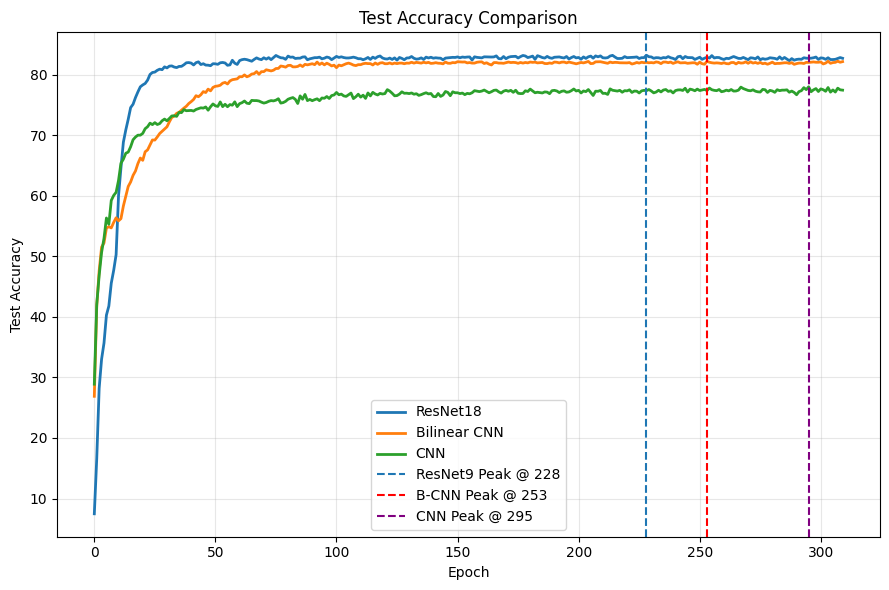

In [13]:
ry=dfr["test_acc"]
by=dfb["test_acc"]
cy=dfc["test_acc"]
max_r = ry.max()
max_r_epoch = ry.idxmax()

max_b = by.max()
max_b_epoch = by.idxmax()

max_c = cy.max()
max_c_epoch = cy.idxmax()

# Plot accuracy curves
plt.figure(figsize=(9, 6))
plt.plot(ry, label="ResNet18", linewidth=2)
plt.plot(by, label="Bilinear CNN", linewidth=2)
plt.plot(cy, label="CNN", linewidth=2)

# Vertical lines at max accuracy epochs
plt.axvline(max_r_epoch, linestyle="--", linewidth=1.5, label=f"ResNet9 Peak @ {max_r_epoch}")
plt.axvline(max_b_epoch, linestyle="--", linewidth=1.5, color="red",label=f"B-CNN Peak @ {max_b_epoch}")
plt.axvline(max_c_epoch, linestyle="--", linewidth=1.5, color="purple",label=f"CNN Peak @ {max_c_epoch}")

plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison")

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Loss

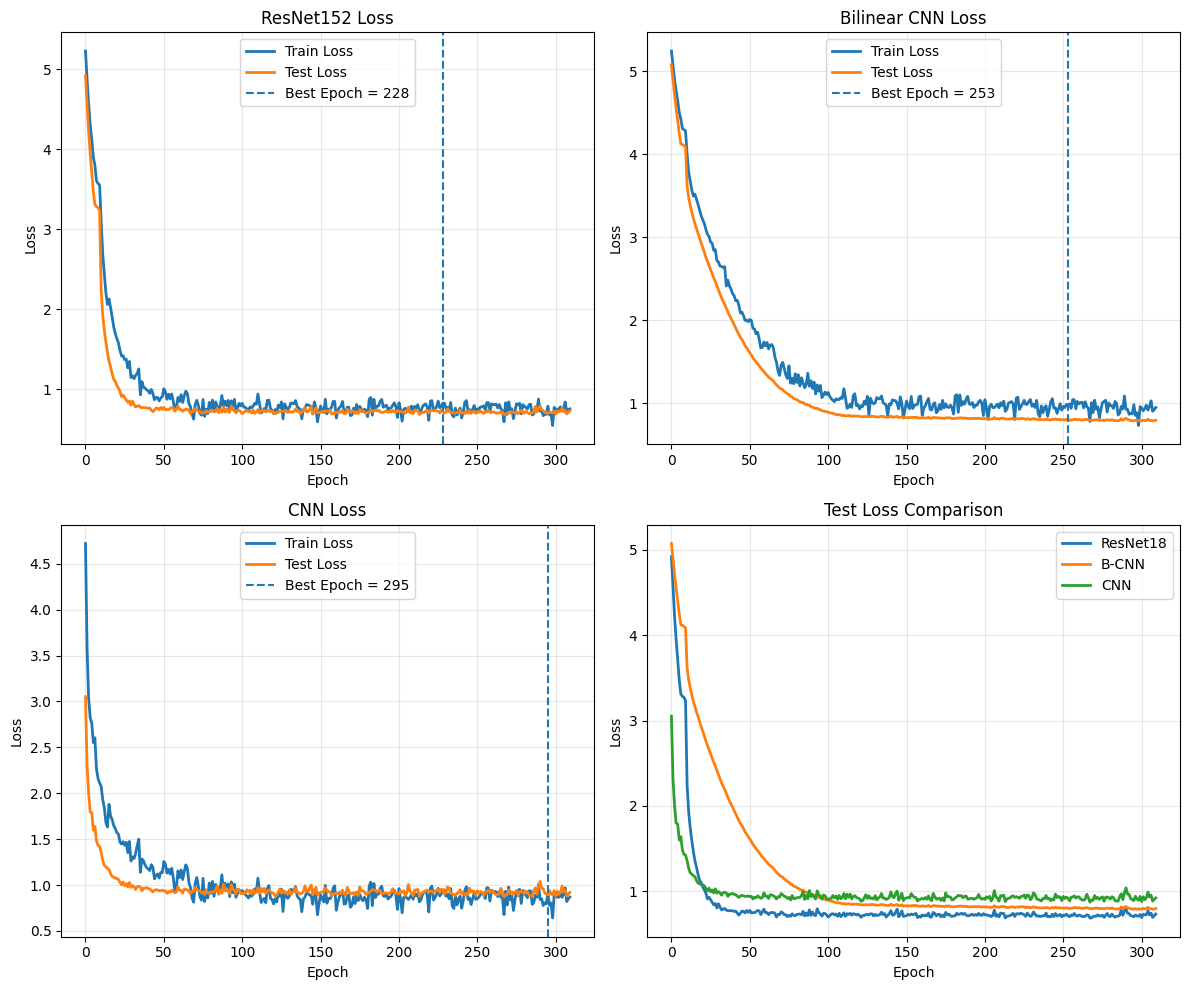

In [15]:
r_train, r_test = dfr["train_loss"], dfr["test_loss"]
b_train, b_test = dfb["train_loss"], dfb["test_loss"]
c_train, c_test = dfc["train_loss"], dfc["test_loss"]
r_best = ry.idxmax()
b_best = by.idxmax()
c_best = cy.idxmax()
# --- Create 2x2 Subplots ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ----------------------------------------------------
# (1) ResNet18: Train vs Test Loss
# ----------------------------------------------------
axes[0, 0].plot(r_train, label="Train Loss", linewidth=2)
axes[0, 0].plot(r_test, label="Test Loss", linewidth=2)
axes[0, 0].axvline(r_best, linestyle="--", linewidth=1.5,
                   label=f"Best Epoch = {r_best}")
axes[0, 0].set_title("ResNet152 Loss")
axes[0, 0].set_xlabel("Epoch")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# ----------------------------------------------------
# (2) B-CNN: Train vs Test Loss
# ----------------------------------------------------
axes[0, 1].plot(b_train, label="Train Loss", linewidth=2)
axes[0, 1].plot(b_test, label="Test Loss", linewidth=2)
axes[0, 1].axvline(b_best, linestyle="--", linewidth=1.5,
                   label=f"Best Epoch = {b_best}")
axes[0, 1].set_title("Bilinear CNN Loss")
axes[0, 1].set_xlabel("Epoch")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# ----------------------------------------------------
# (3) CNN: Train vs Test Loss
# ----------------------------------------------------
axes[1, 0].plot(c_train, label="Train Loss", linewidth=2)
axes[1, 0].plot(c_test, label="Test Loss", linewidth=2)
axes[1, 0].axvline(c_best, linestyle="--", linewidth=1.5,
                   label=f"Best Epoch = {c_best}")
axes[1, 0].set_title("CNN Loss")
axes[1, 0].set_xlabel("Epoch")
axes[1, 0].set_ylabel("Loss")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# ----------------------------------------------------
# (4) Combined Test Loss (All Models)
# ----------------------------------------------------
axes[1, 1].plot(r_test, label="ResNet18", linewidth=2)
axes[1, 1].plot(b_test, label="B-CNN", linewidth=2)
axes[1, 1].plot(c_test, label="CNN", linewidth=2)
axes[1, 1].set_title("Test Loss Comparison")
axes[1, 1].set_xlabel("Epoch")
axes[1, 1].set_ylabel("Loss")
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()